In [114]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()
import warnings
warnings.filterwarnings('ignore')



In [115]:
#Load the data and infer the date format for the date features

df = pd.read_csv('BikeSales-Dusty2.csv', 
                  parse_dates=['First_Seen','Last_Seen','Last_Modified'], 
                  infer_datetime_format=True)



In [116]:
df.head()

,ABS,Adjustable_Seat,Bike,Body,Bore,Cam_Type,Carburettor,Charging_Method,Clutch_Type,Colour,...,Valves_Per_Cylinder,Warranty_KMs,Warranty_in_Months_from_First_Registration,Wet_Operational_Weight,Wheel_Type,Wheelbase,Width,Windscreen,Release_Year,Seller
0,No,No,Kuda Pro 250,Adventure Touring,62.000,SOHC (Single Over Head Cam),NaN,Alternator & Regulator-Rectifier,Multi plate,green,...,4.0,No,3,150.0,Spoke,1480.0,860.000,Standard,2009,Private
1,No,No,250 R Road Manual 5sp 250cc,Super Sport,77.000,SOHC (Single Over Head Cam),NaN,Engine,Multi plate,red,...,4.0,No,0,136.0,Spoke,1350.0,818.888,Standard,2013,Private
2,No,No,GN250,Naked,72.000,SOHC (Single Over Head Cam),NaN,Engine,NaN,black,...,4.0,No,0,143.0,NaN,1490.0,803.466,Standard,1991,Private
3,No,No,GSX1100 ESD Road Manual 5sp 1100cc,Sport Touring,74.100,DOHC (Double Over Head Cam),Constant velocity,Engine,NaN,black,...,4.0,No,0,253.0,NaN,1441.0,770.196,Standard,1984,Private
4,No,No,TS250 Trail Manual 5sp 250cc,Trail,81.364,Reed Valve,NaN,Engine,NaN,red,...,4.0,No,0,143.0,NaN,1399.0,818.888,Standard,1976,Private


In [117]:
#######################################################################
### DELETE CELL WHEN MACHINE LEARNING IMPUTATION HAS BEEN COMPLETED ###
#######################################################################

# The EDA notebook will eventually perform machine learning on these features to impute the missing values.
# Just so there isn't any issues with the data for feature engineering, i'l be using the most common value.

df['Body'][df['Body'].isnull() == True] = df['Body'].mode()[0]
df['Carburettor'][df['Carburettor'].isnull() == True] = df['Carburettor'].mode()[0]
df['Clutch_Type'][df['Clutch_Type'].isnull() == True] = df['Clutch_Type'].mode()[0]
df['Country_of_Origin'][df['Country_of_Origin'].isnull() == True] = df['Country_of_Origin'].mode()[0]
df['Drive_Type'][df['Drive_Type'].isnull() == True] = df['Drive_Type'].mode()[0]
df['Frame_Material'][df['Frame_Material'].isnull() == True] = df['Frame_Material'].mode()[0]
df['Front_Brake_Description'][df['Front_Brake_Description'].isnull() == True] = df['Front_Brake_Description'].mode()[0]
df['Front_Suspension'][df['Front_Suspension'].isnull() == True] = df['Front_Suspension'].mode()[0]
df['Rear_Brake_Description'][df['Rear_Brake_Description'].isnull() == True] = df['Rear_Brake_Description'].mode()[0]
df['Rear_Suspension'][df['Rear_Suspension'].isnull() == True] = df['Rear_Suspension'].mode()[0]
df['Wheel_Type'][df['Wheel_Type'].isnull() == True] = df['Wheel_Type'].mode()[0]



df['Body'][df['Body'].str.contains('MY') == True] = \
    df['Body'][df['Body'].str.contains('MY') == True].str.split().str[:-1].str.join(' ');


In [118]:
df.isnull().sum().sum()

0

## Brand
This is the manufacturer of the vehicle and is the same as the Make of the bike. This is a common way to distinguish between bike at the simplest level. 


In [119]:
# Features to extract from the data
# Brand, model, Age, 
df['Brand'] = df['URL'].str.split('/').str[5].str.split('-').str[1].str.capitalize()

# Replace known names with more than one word, like Harley Davidson
df['Brand'][df['Brand'] == 'Harley'] = 'Harley Davidson'
df['Brand'][df['Brand'] == 'Mv'] = 'MV Agusta'
df['Brand'][df['Brand'] == 'Royal'] = 'Royal Enfield'
df['Brand'][df['Brand'] == 'Moto'] = 'Moto Guzzi'
df['Brand'][df['Brand'] == 'Can'] = 'Can Am'




## Model
This describes the Brand of the bike in more detail, providing a slightly more complex discription. 

In [120]:
df['Model'] = df['URL'].str.split('/').str[5].str.split('-').str[2:].str.join(' ').str.capitalize()

# Need to deal with the models that have two word, like Harley Davidson
df['Model'][df['Model'].str.contains('Davidson') == True] = \
    df['Model'][df['Model'].str.contains('Davidson') == True].str.split().str[1:].str.join(' ');
df['Model'][df['Model'].str.contains('Agusta') == True] = \
    df['Model'][df['Model'].str.contains('Agusta') == True].str.split().str[1:].str.join(' ');
df['Model'][df['Model'].str.contains('Enfield') == True] = \
    df['Model'][df['Model'].str.contains('Enfield') == True].str.split().str[1:].str.join(' ');
df['Model'][df['Model'].str.contains('Guzzi') == True] = \
    df['Model'][df['Model'].str.contains('Guzzi') == True].str.split().str[1:].str.join(' ');
df['Model'][df['Model'].str.contains('Am') == True] = \
    df['Model'][df['Model'].str.contains('Am') == True].str.split().str[1:].str.join(' ');



In [121]:
# Remove the MY YY from the end of the Model description.
# This is the effective year, the bike was registerd on the road
df['Model'][df['Model'].str.contains('my') == True] = \
    df['Model'][df['Model'].str.contains('my') == True].str.split().str[:-1].str.join(' ');
df['Model'][df['Model'].str.contains('MY') == True] = \
    df['Model'][df['Model'].str.contains('MY') == True].str.split().str[:-1].str.join(' ');


## Age
Any asset decreasing in value with age. We can deterime the age using todays date and the release year.

In [122]:
df['Age'] = datetime.now().year - df['Release_Year']
df.drop(['Release_Year'], axis=1, inplace=True)


## Live Advertisment
This will be the time the advertisement is live on the website. I would expect this to provide some insight in how long it takes to seel a bike on the site, once there is a sufficient number of bikes sold in the data set.




In [123]:
days = (df['Last_Seen'] - df['First_Seen'])
df['Live_Add'] = days.astype('timedelta64[D]')

# Correct for bike that have not been sold yet
#df['Time_to_Sale'][(df['Last_Seen'] == df['Last_Seen'].max()) == True] = 999


# Sold
We can assume the bike is sold if the last time the advertisement was seen, isn't the most recent time. ie, the advertisement has been taken down. We will assume this means the bike has been sold, even though the seller could have decided to not sell the bike.

In [124]:
df['Sold'] = 'For Sale'
df['Sold'][(df['Last_Seen'] != df['Last_Seen'].max()) == True] = 'Sold'

df[['Live_Add','Sold','Last_Seen']].sample(10)

,Live_Add,Sold,Last_Seen
5940,48.0,Sold,2019-05-13
17004,23.0,Sold,2019-05-13
19119,14.0,Sold,2019-05-13
15634,24.0,Sold,2019-05-13
12728,-82.0,Sold,2019-05-14
3809,50.0,Sold,2019-05-13
13445,-151.0,Sold,2019-05-06
24236,0.0,Sold,2019-06-03
4112,50.0,Sold,2019-05-13
5609,36.0,Sold,2019-04-30


## Engine Size
This is the same as the Engine description, just converted to the more common value.

In [125]:

allbins =[0,65,80,90,110,130,180,225,270,320,370,420,470,520,570,625,675,730,820,870,920,970,
          1050,1150,1250,1350,1450,1550,1650,1750,1850,1950,2050,2250,2400]
labels = [50,70,90,100,125,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,
          1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2300]

df['Engine_Size'] = pd.to_numeric(pd.cut(df['Engine_Description'],
                                    bins=allbins,
                                    labels=labels))

df.drop(['Engine_Description'], axis=1, inplace=True)


- **Valid_registration**: The length of time the bike is still registered (months or days) = (registration expirey - todays date); Nulls = 0
- **Live_Advertisement** The length of time the advertisment is live,




In [126]:

df.to_csv('Bikesales_Features.csv',index=False)

In [127]:
# Create some supporting plotting functions
def plot_scatter_grid(data, possible_predictors,col=4):
    
    row = int(len(possible_predictors)/col)+1
    
    
    target = data['Price']
    fig = plt.figure(figsize=(20,row*4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for idx, predictor in enumerate(possible_predictors):
        ax = fig.add_subplot(row, col, idx+1)
        plt.scatter(data[predictor], target, s=1)
        ax.set_title(predictor)
        
def plot_distribution_grid(data, possible_predictors,col=4):
    
    row = int(len(possible_predictors)/col)+1
    
    target = data['Price']
    fig = plt.figure(figsize=(20,row*4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for idx, predictor in enumerate(possible_predictors):
        plot_data = data[predictor][data[predictor].isnull() == False]
        ax = fig.add_subplot(row, col, idx+1)
        sns.distplot(plot_data)
        ax.set_title(predictor)
        
def plot_box_grid(data, possible_predictors,col=4):
    
    row = int(len(possible_predictors)/col)+1
    
    target = data['Price']
    fig = plt.figure(figsize=(20,row*4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for idx, predictor in enumerate(possible_predictors):
        ax = fig.add_subplot(row, col, idx+1)
        sns.boxplot(x=data[predictor])
        ax.set_title(predictor)


def plot_correlation_matrix(data,figsize=(15,15)):
    corr_mat=data.corr(method='pearson')
    plt.figure(figsize=figsize)
    sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')
    

In [128]:
sport = df[df['Body'].str.contains('Sport') == True]
sport.shape


(6372, 86)

In [129]:
def scatter(data,x,y,hue=None,title='',figsize=(12,10)):
    ax = plt.figure(figsize=figsize)
    sns.scatterplot(x=x,y=y,hue=hue,data=data);
    plt.title(title,fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



def count_plot(data, feature,figsize=(12,10)):
    ax = data[feature].value_counts().sort_values().plot(kind='bar',figsize=figsize);
    ax.set_xlabel(feature);
    ax.set_ylabel('Counts');
    ax.set_title('Distribution of '+feature);
  
    
    


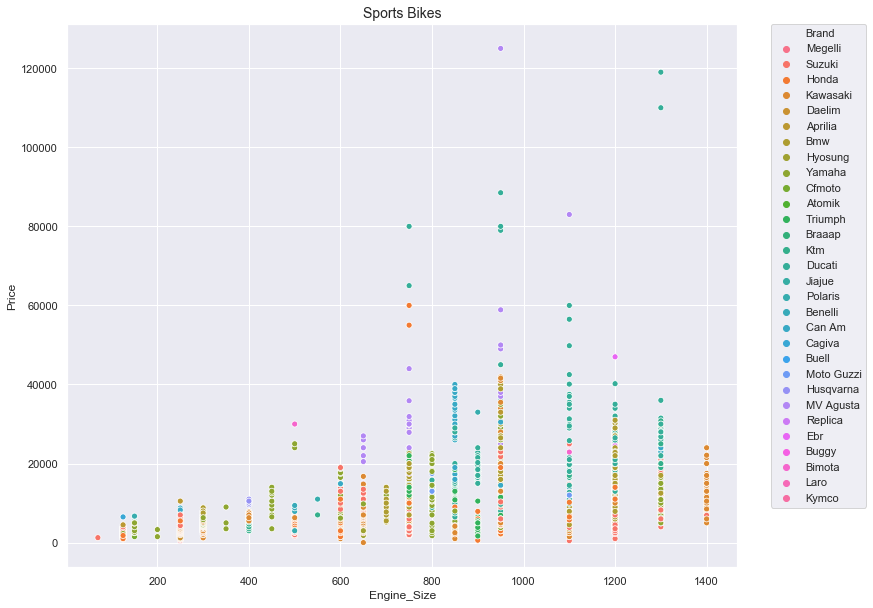

In [130]:
scatter(sport,'Engine_Size','Price',hue='Brand',title='Sports Bikes')

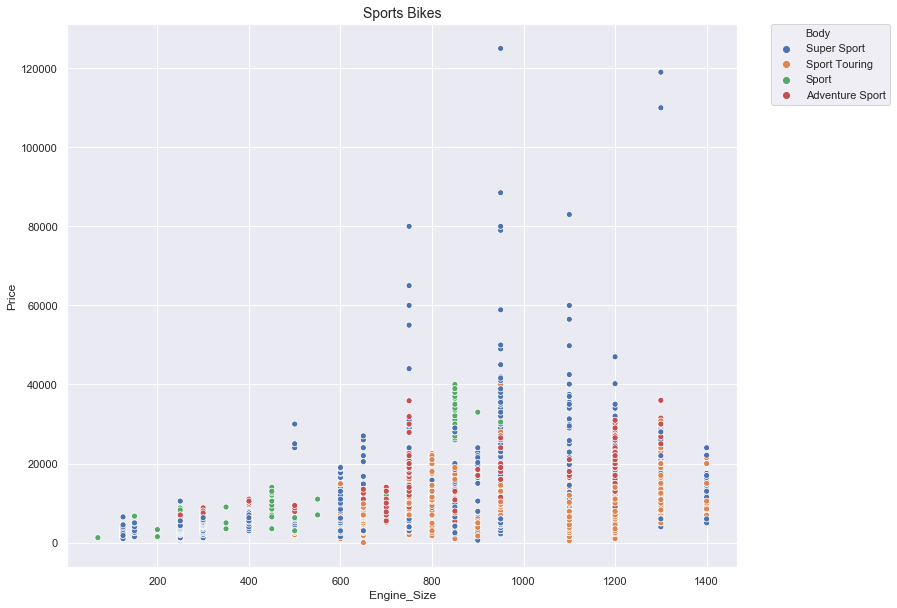

In [131]:
scatter(sport,'Engine_Size','Price',hue='Body',title='Sports Bikes')

In [132]:
sport_600 = sport[(sport['Engine_Size'] > 550) & (sport['Engine_Size'] < 700)]
print (sport_600.shape)

(1270, 86)


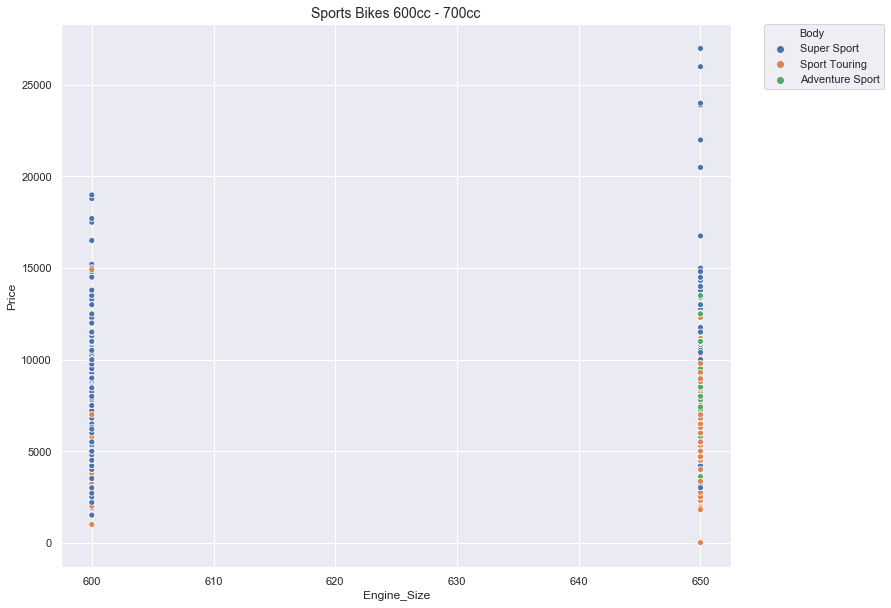

In [133]:
scatter(sport_600,'Engine_Size','Price',hue='Body',title='Sports Bikes 600cc - 700cc')




In [134]:
supersport = df[df['Body'].str.contains('Super Sport') == True]
supersport.shape

(3665, 86)

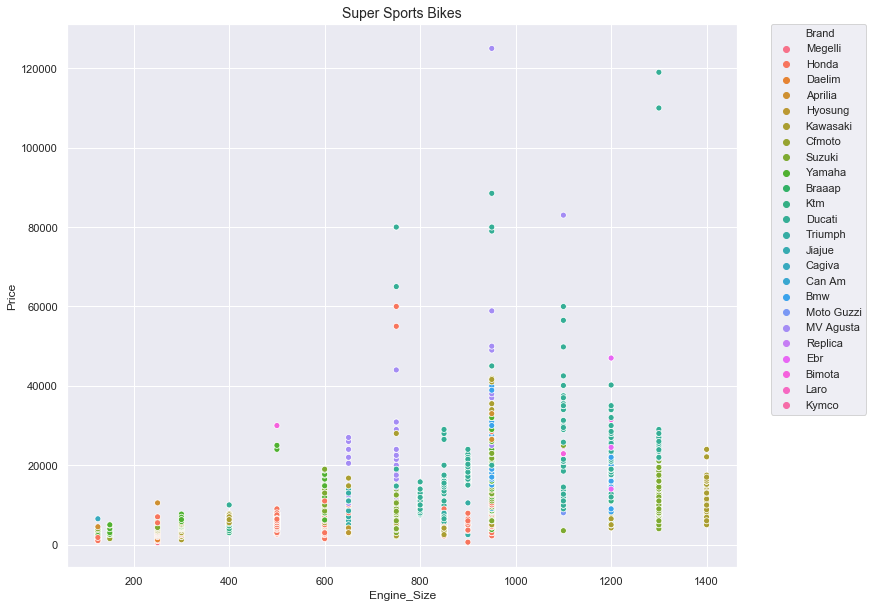

In [135]:
scatter(supersport,'Engine_Size','Price',hue='Brand',title='Super Sports Bikes')


In [136]:
supersport['Body'].unique()

array(['Super Sport'], dtype=object)

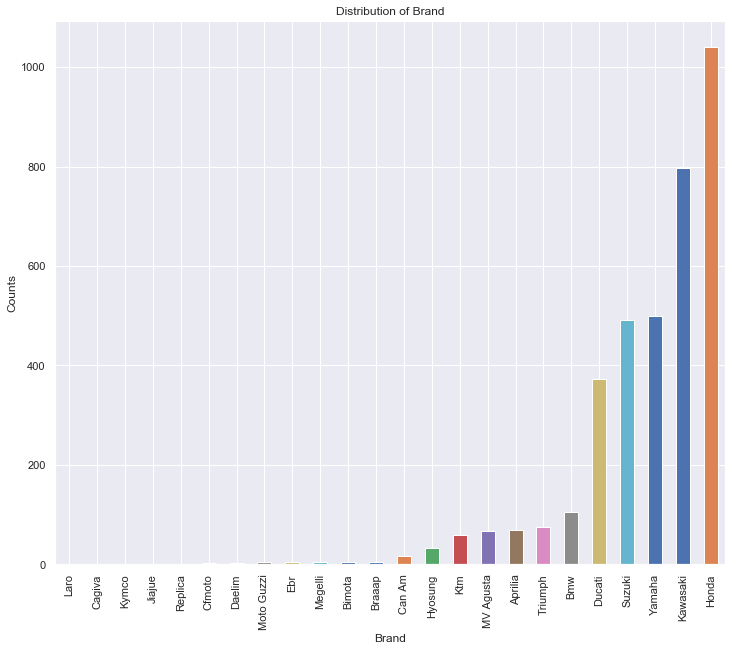

In [137]:
  
count_plot(supersport, 'Brand',figsize=(12,10))